<a href="https://colab.research.google.com/github/ijinshes2ly/Decision_tree/blob/main/Seoul_Commercial_District_dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Absolute Error (MAE): 4538.25
R² Score: 0.98


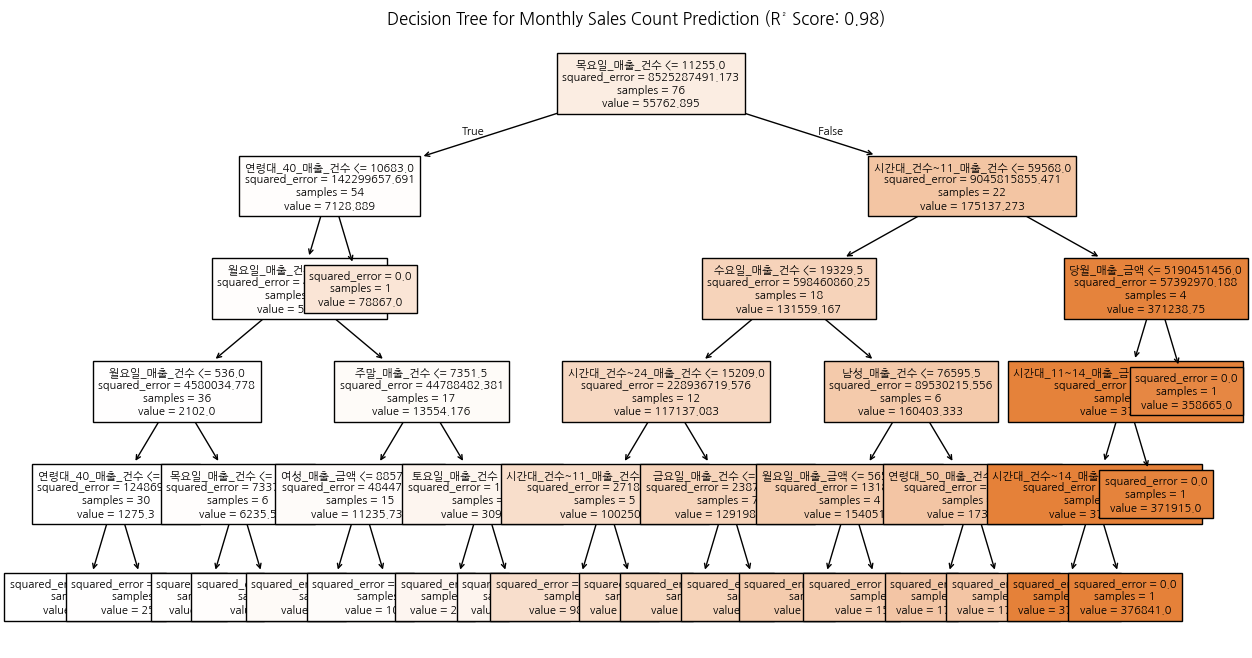

예상 당월 매출 건수: 511 건


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score
!pip install koreanize-matplotlib
import koreanize_matplotlib
#결정트리 회귀 모델
#1. CSV 파일 로드
file_path = "서울시_상권분석_데이터.csv"  # CSV 파일 경로 입력
df = pd.read_csv(file_path, encoding="utf-8")

# 2. "사가정역" 데이터 필터링
df = df[df["상권_코드_명"] == "사가정역"]

# 3. 필요없는 컬럼 제거
drop_columns = ["기준_년분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명",
                "서비스_업종_코드", "서비스_업종_코드_명"]  # 분석에 필요 없는 컬럼 제거
df = df.drop(columns=drop_columns)

# 4. 결측값 제거
df = df.dropna()

# 5. 입력(X)과 타겟(y) 분리
X = df.drop(columns=["당월_매출_건수"])  # 입력 변수 (매출 건수를 예측해야 하므로 제외)
y = df["당월_매출_건수"]  # 타겟 변수 (예측 대상)

# 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 결정트리 회귀 모델 학습
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# 8. 모델 예측 및 평가
y_pred = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. 결정 트리 시각화
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, ax=ax, fontsize=8)
plt.title(f"Decision Tree for Monthly Sales Count Prediction (R² Score: {r2:.2f})")
plt.show()

# 10. 예측 함수
def predict_sales_count(data_input):
    input_data = pd.DataFrame([data_input], columns=X.columns)
    prediction = dt_model.predict(input_data)
    return f"예상 당월 매출 건수: {prediction[0]:,.0f} 건"

# 예측 예시
sample_input = X.iloc[0].values  # 첫 번째 샘플 데이터로 예측
print(predict_sales_count(sample_input))


Mean Absolute Error (MAE): 325820231.54
R² Score: 0.98


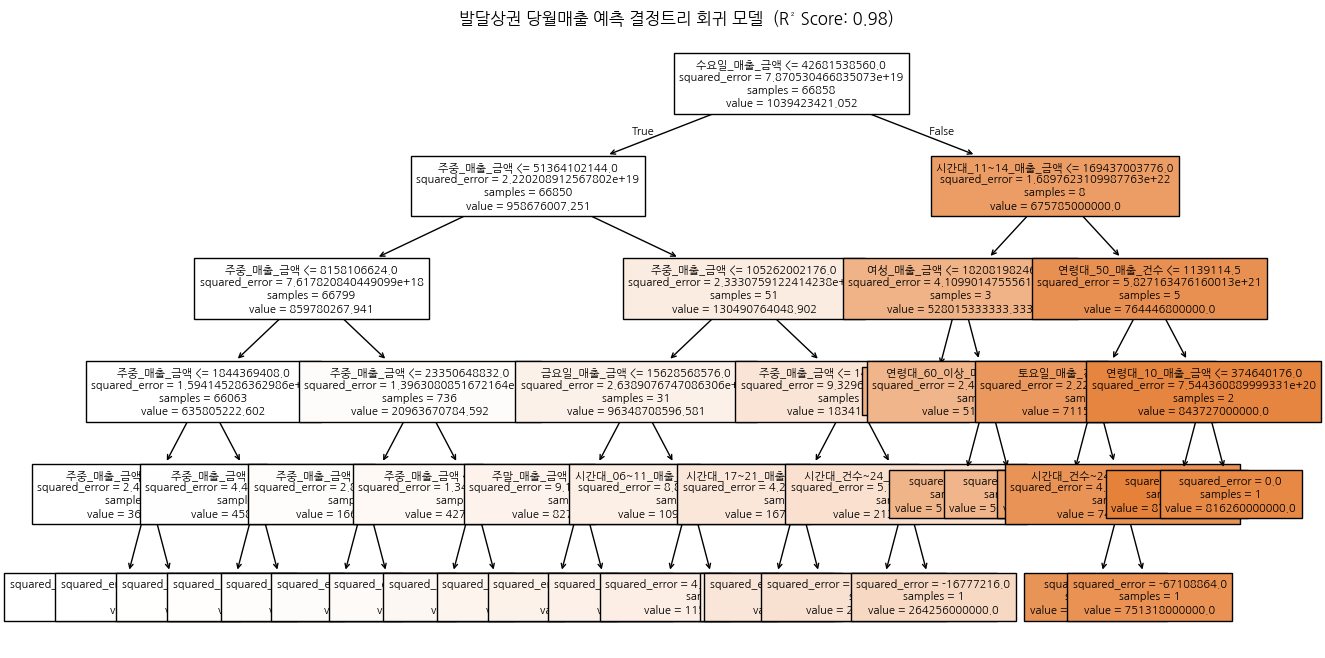

In [11]:
#문제 1. 서울시 상권분석 데이터셋을 이용하여 발달상권의 당월 매출금액을 예측하는 예측모델을 개발하세요
#결정트리 알고리즘을 사용해서 예측모델을 만드세요.
#예측정확도를 90% 이상 충족하고
#위 예측모델을 만들기 위한 독립변수를 제시하세요.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

df= pd.read_csv("서울시_상권분석_데이터.csv")
df = df.dropna()
#데이터셋 분리
df_developed= df.loc[df["상권_구분_코드_명"] == "발달상권"]

#필요없는 컬럼 제거
drop_columns = ["기준_년분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명",
                "서비스_업종_코드", "서비스_업종_코드_명"]  # 분석에 불필요한 컬럼 제거
df = df.drop(columns=drop_columns)

# 결측값 제거
df = df.dropna()

# (X)과 타겟(y) 분리
X = df.drop(columns=["당월_매출_금액"])  # 입력 변수
y = df["당월_매출_금액"]  # 타겟 변수 (예측 대상)

# 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#결정트리 회귀 모델 생성 및 학습
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# 모델 예측 및 평가
y_pred = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. 결정 트리 시각화
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, ax=ax, fontsize=8)
plt.title(f"발달상권 당월매출 예측 결정트리 회귀 모델  (R² Score: {r2:.2f})")
plt.show()

In [6]:
#문제 2. 미아사거리의 주중 매출액을 예측하는 모델을 개발하세요. 조건은 1번과 같습니다.
#미아사거리 주중매출액과 상관관계 높은 컬럼찾기: 독립변수 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

# 1. CSV 파일 로드
file_path = "서울시_상권분석_데이터.csv"  # CSV 파일 경로 입력
df = pd.read_csv(file_path, encoding="utf-8")

# 2. "미아사거리" 데이터 필터링
df_filtered= df.loc[df["상권_코드_명"] == "미아사거리"]

# 3. 필요없는 컬럼 제거
drop_columns = ["기준_년분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명",
                "서비스_업종_코드", "서비스_업종_코드_명"]
df_filtered = df_filtered.drop(columns=drop_columns)  # 불필요한 컬럼 제거(범주형)

# 4.미아사거리 주중매출 금액과 상관관계 높은 컬럼 구하기
correlation_matrix = df_filtered.corr()

#5.미아사거리 주중 매출과 상관관계가 높은 상위 5개 변수 추출
independent_variables = correlation_matrix["주중_매출_금액"].drop("주중_매출_금액").sort_values(ascending=False).head(5)
print(independent_variables)

당월_매출_금액        0.989689
여성_매출_금액        0.960585
금요일_매출_금액       0.959291
화요일_매출_금액       0.956393
연령대_50_매출_금액    0.952604
Name: 주중_매출_금액, dtype: float64


Mean Absolute Error (MAE): 54606941.37
R² Score: 0.99


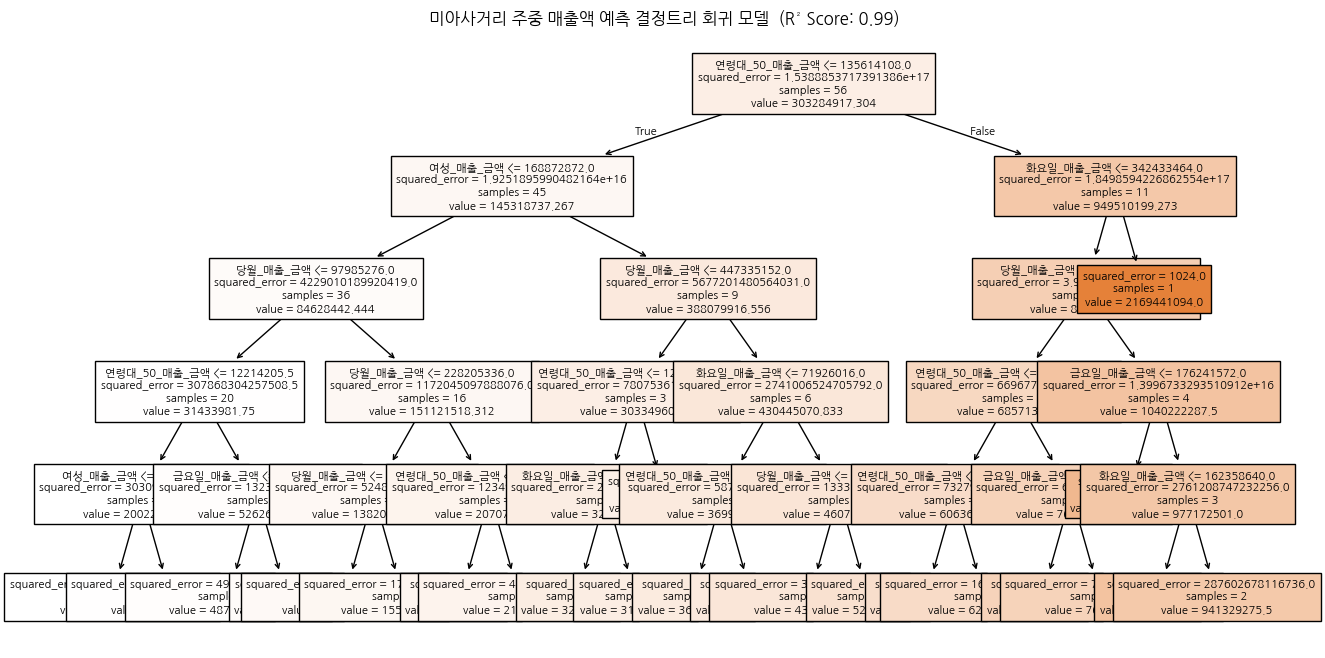

In [7]:
df_filtered = df_filtered.dropna()
6.#데이터셋 분리
df_developed= df.loc[df["상권_코드_명"] == "미아사거리"]
X=df_developed[['당월_매출_금액', '여성_매출_금액','금요일_매출_금액','화요일_매출_금액','연령대_50_매출_금액']]
y=df_developed["주중_매출_금액"]

#7. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#8.결정트리 회귀 모델 생성 및 학습
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

#9.모델 예측 및 평가
y_pred = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 10. 결정 트리 시각화
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, ax=ax, fontsize=8)
plt.title(f"미아사거리 주중 매출액 예측 결정트리 회귀 모델  (R² Score: {r2:.2f})")
plt.show()

In [8]:
#문제 3. 특정상권내 특정 조건 매출 예측
#발달상권 내 당구장의 시간대_21~24_매출_금액 예측
#발달상권 내 당구장의 21-24매출 금액과 상관관계 높은 컬럼 찾기: 독립변수 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, r2_score

# 1. CSV 파일 로드
file_path = "서울시_상권분석_데이터.csv"  # CSV 파일 경로 입력
df = pd.read_csv(file_path, encoding="utf-8")

# 2. "발달상권 내 당구장" 데이터 필터링
df_filtered= df.loc[df["상권_구분_코드_명"] == "발달상권"]
df_filtered2=df_filtered.loc[df_filtered["서비스_업종_코드_명"]=="당구장"]

# 3. 필요없는 컬럼 제거
drop_columns = ["기준_년분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명",
                "서비스_업종_코드", "서비스_업종_코드_명"]
df_filtered2 = df_filtered2.drop(columns=drop_columns)  # 불필요한 컬럼 제거

# 4.발달상권 내 당구장 시간대_21~24_매출_금액과 상관관계 높은 컬럼 구하기
correlation_matrix = df_filtered2.corr()

#5.미아사거리 주중 매출과 상관관계가 높은 상위 5개 변수 추출
independent_variables = correlation_matrix["시간대_21~24_매출_금액"].drop("시간대_21~24_매출_금액").sort_values(ascending=False).head(5)
print(independent_variables)

당월_매출_금액           0.888455
주중_매출_금액           0.872763
남성_매출_금액           0.872546
시간대_건수~24_매출_건수    0.851486
금요일_매출_금액          0.850513
Name: 시간대_21~24_매출_금액, dtype: float64


Mean Absolute Error (MAE): 54606941.37
R² Score: 0.99


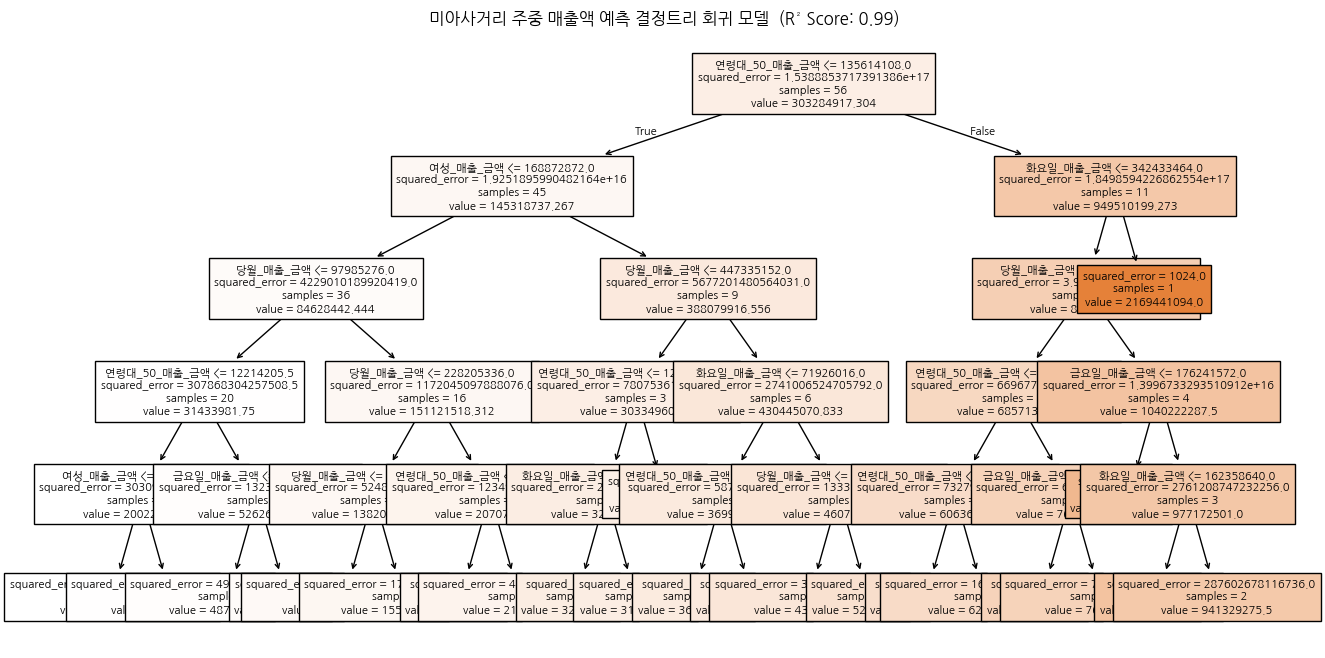

In [9]:
df_filtered2 = df_filtered2.dropna()
6.#데이터셋 분리
X=df_developed[['당월_매출_금액', '여성_매출_금액','금요일_매출_금액','화요일_매출_금액','연령대_50_매출_금액']]
y=df_developed["주중_매출_금액"]

#7. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#8.결정트리 회귀 모델 생성 및 학습
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

#9.모델 예측 및 평가
y_pred = dt_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 10. 결정 트리 시각화
fig, ax = plt.subplots(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, filled=True, ax=ax, fontsize=8)
plt.title(f"미아사거리 주중 매출액 예측 결정트리 회귀 모델  (R² Score: {r2:.2f})")
plt.show()

Mean Absolute Error (MAE): 387057364.34
R² Score: 0.99


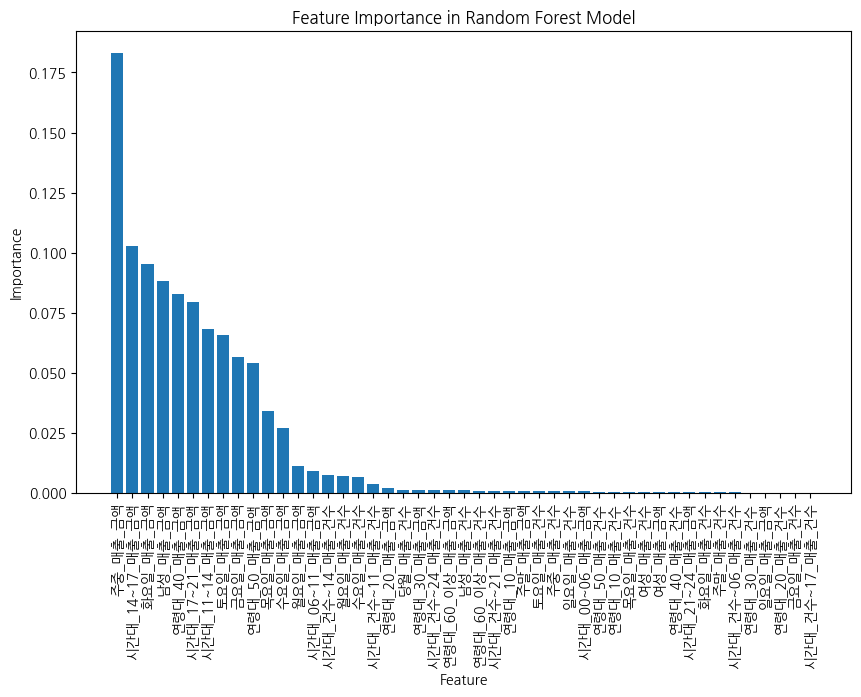

발달상권 예상 당월 매출 금액: 250,537,662 원


In [10]:
#발달상권의 당월 매출금액을 예측
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
!pip install koreanize-matplotlib
import koreanize_matplotlib
# 1. CSV 파일 로드
file_path = "서울시_상권분석_데이터.csv"  # CSV 파일 경로 입력
df = pd.read_csv(file_path, encoding="utf-8")

# 2. "발당상권" 데이터 필터링
df = df[df["상권_구분_코드_명"] == "발달상권"]

# 3. 필요없는 컬럼 제거
drop_columns = ["기준_년분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명",
                "서비스_업종_코드", "서비스_업종_코드_명"]  # 분석에 불필요한 컬럼 제거
df = df.drop(columns=drop_columns)

# 4. 결측값 제거
df = df.dropna()

# 5. 입력(X)과 타겟(y) 분리
X = df.drop(columns=["당월_매출_금액"])  # 입력 변수
y = df["당월_매출_금액"]  # 타겟 변수 (예측 대상)

# 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 랜덤포레스트 회귀 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# 8. 모델 예측 및 평가
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. 변수 중요도 시각화
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

# 10. 예측 함수
def predict_sales_count(data_input):
    input_data = pd.DataFrame([data_input], columns=X.columns)
    prediction = rf_model.predict(input_data)
    return f"발달상권 예상 당월 매출 금액: {prediction[0]:,.0f} 원"

# 예측 예시
sample_input = X.iloc[0].values  # 첫 번째 샘플 데이터로 예측
print(predict_sales_count(sample_input))


cf) 결정트리회귀모델 R^2 = 0.98

Mean Absolute Error (MAE): 39896999.93
R² Score: 1.00


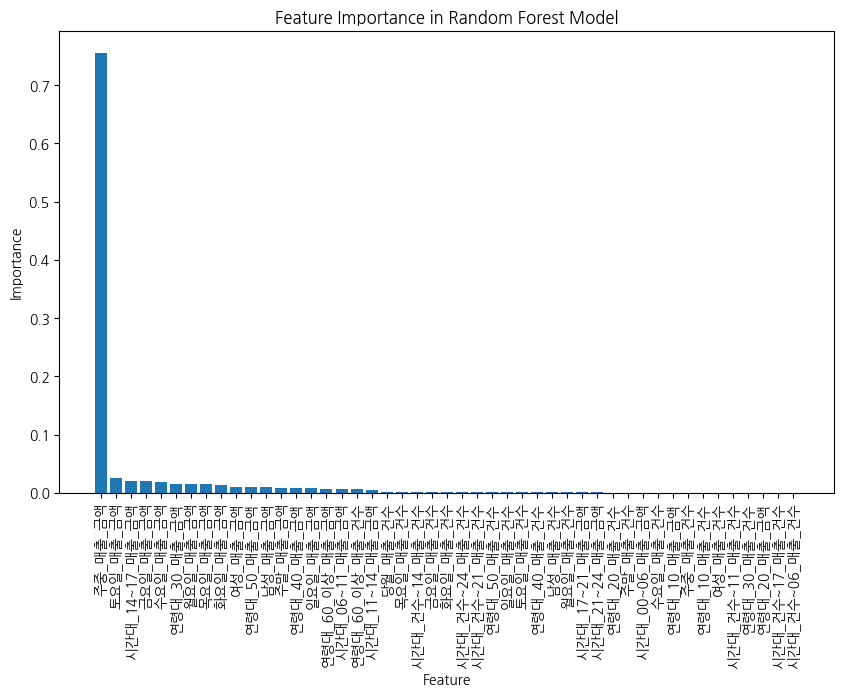

슈퍼마켓 예상 당월 매출 금액: 21,840,569 원


In [18]:
#서비스 업종별(개인적으로 하나만 선택) 당월_매출_금액 예측
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
!pip install koreanize-matplotlib
import koreanize_matplotlib
# 1. CSV 파일 로드
file_path = "서울시_상권분석_데이터.csv"  # CSV 파일 경로 입력
df = pd.read_csv(file_path, encoding="utf-8")

# 2. "발당상권" 데이터 필터링
df = df[df["서비스_업종_코드_명"] == "슈퍼마켓"]

# 3. 필요없는 컬럼 제거
drop_columns = ["기준_년분기_코드", "상권_구분_코드", "상권_구분_코드_명", "상권_코드", "상권_코드_명",
                "서비스_업종_코드",'서비스_업종_코드_명']  # 분석에 불필요한 컬럼 제거
df = df.drop(columns=drop_columns)

# 4. 결측값 제거
df = df.dropna()

# 5. 입력(X)과 타겟(y) 분리
X = df.drop(columns=["당월_매출_금액"])  # 입력 변수
y = df["당월_매출_금액"]  # 타겟 변수 (예측 대상)

# 6. 데이터 분할 (훈련 80%, 테스트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. 랜덤포레스트 회귀 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# 8. 모델 예측 및 평가
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# 9. 변수 중요도 시각화
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_idx], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest Model")
plt.show()

# 10. 예측 함수
def predict_sales_count(data_input):
    input_data = pd.DataFrame([data_input], columns=X.columns)
    prediction = rf_model.predict(input_data)
    return f"슈퍼마켓 예상 당월 매출 금액: {prediction[0]:,.0f} 원"

# 예측 예시
sample_input = X.iloc[0].values  # 첫 번째 샘플 데이터로 예측
print(predict_sales_count(sample_input))
